In [105]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10

# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)


In [108]:
def  MSE(pred,y):

    m = len(y)

    cost = (1/(2*m)) * np.sum(np.square(pred - y))
    return cost

In [45]:
def acc(y, pred):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = np.sum(np.argmax(pred, axis=1) == np.argmax(y, axis=1))/(y.shape[0])
        return acc

In [106]:
def gradient_descent(train_data,train_lbl,test_data,test_lbl,theta,b,learning_rate=0.01,iterations=100):

    lr_decay = 0.99
    m = len(train_lbl)
    train_error_history = []
    test_error_history = []
    train_acc_history = []
    test_acc_history = []
    for it in range(iterations):
        
        train_prediction = np.dot(train_data,theta) + b 
        test_prediction = np.dot(test_data,theta) + b
        
        theta = theta -(1/m)*learning_rate*(train_data.T.dot((train_prediction - train_lbl)))
        b = b - 1/m*((train_prediction - train_lbl).sum(axis =0))
        
        train_acc = acc(train_prediction,train_lbl)
        train_acc_history.append(train_acc)

        test_acc = acc(test_prediction,test_lbl)
        test_acc_history.append(test_acc)

        train_loss = MSE(train_prediction,train_lbl)
        train_error_history.append(train_loss)

        test_loss = MSE(test_prediction,test_lbl)
        test_error_history.append(test_loss)

        learning_rate *= lr_decay
        print('Epoch %d/%d: Train Loss: %f, Training Accuracy: %f, Test Loss: %f, Test Accuracy: %f'%(it+1, iterations,train_loss, train_acc, test_loss, test_acc))
    return theta, train_error_history, test_error_history, test_acc_history, train_acc_history

In [109]:
theta,train_error_history,test_error_history,test_acc_history,train_acc_history = gradient_descent(x_train,y_train,x_test,y_test,w1,b1,learning_rate=0.01,iterations=300)

Epoch 1/300: Train Loss: 0.500000, Training Accuracy: 0.101900, Test Loss: 0.500001, Test Accuracy: 0.100600
Epoch 2/300: Train Loss: 0.439285, Training Accuracy: 0.244540, Test Loss: 0.439044, Test Accuracy: 0.248700
Epoch 3/300: Train Loss: 0.434024, Training Accuracy: 0.258500, Test Loss: 0.433679, Test Accuracy: 0.264400
Epoch 4/300: Train Loss: 0.430560, Training Accuracy: 0.270220, Test Loss: 0.430171, Test Accuracy: 0.277600
Epoch 5/300: Train Loss: 0.427954, Training Accuracy: 0.280380, Test Loss: 0.427550, Test Accuracy: 0.286700
Epoch 6/300: Train Loss: 0.425875, Training Accuracy: 0.288140, Test Loss: 0.425468, Test Accuracy: 0.294300
Epoch 7/300: Train Loss: 0.424160, Training Accuracy: 0.294780, Test Loss: 0.423758, Test Accuracy: 0.299600
Epoch 8/300: Train Loss: 0.422714, Training Accuracy: 0.300340, Test Loss: 0.422318, Test Accuracy: 0.304400
Epoch 9/300: Train Loss: 0.421471, Training Accuracy: 0.304760, Test Loss: 0.421083, Test Accuracy: 0.308600
Epoch 10/300: Train

In [100]:
train_acc_history[-1]

0.38484

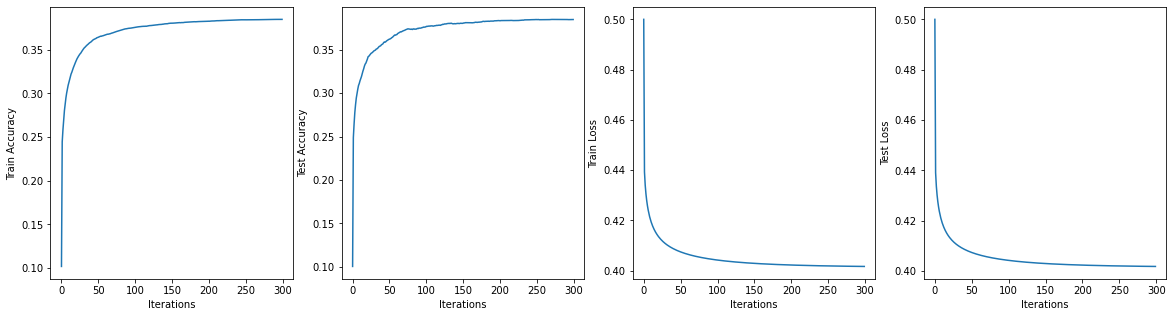

In [110]:
fig, axes = plt.subplots(1, 4, figsize = (20,5))
axes[0].plot(train_acc_history)
axes[1].plot(test_acc_history)
axes[2].plot(train_error_history)
axes[3].plot(test_error_history)
axes[0].set(xlabel='Iterations', ylabel='Train Accuracy')
axes[1].set(xlabel='Iterations', ylabel='Test Accuracy')
axes[2].set(xlabel='Iterations', ylabel='Train Loss')
axes[3].set(xlabel='Iterations', ylabel='Test Loss')
plt.show()

In [60]:
theta

array([[-5.64560497e-04,  4.05020455e-04, -9.25202504e-05, ...,
         1.35714857e-04,  4.06171787e-04,  4.74591532e-04],
       [-2.07350851e-04, -6.45071601e-04,  3.80555395e-04, ...,
         1.03035800e-03,  7.68343411e-04,  1.34542603e-03],
       [ 1.29886055e-03, -1.06401515e-03, -1.69745233e-03, ...,
         2.27360395e-03,  1.74271202e-03,  2.72539459e-03],
       ...,
       [-9.57026836e-04,  1.62791098e-03, -5.60014170e-04, ...,
         1.67736593e-03, -3.12834805e-03,  2.95752624e-03],
       [-1.19382779e-03,  1.23664634e-03, -1.30524839e-04, ...,
         1.20615063e-03, -1.21431890e-03,  1.88180561e-03],
       [-1.01202298e-03,  2.05590038e-03, -1.06575598e-03, ...,
        -1.57153335e-03,  8.29053842e-04,  1.97392774e-03]])

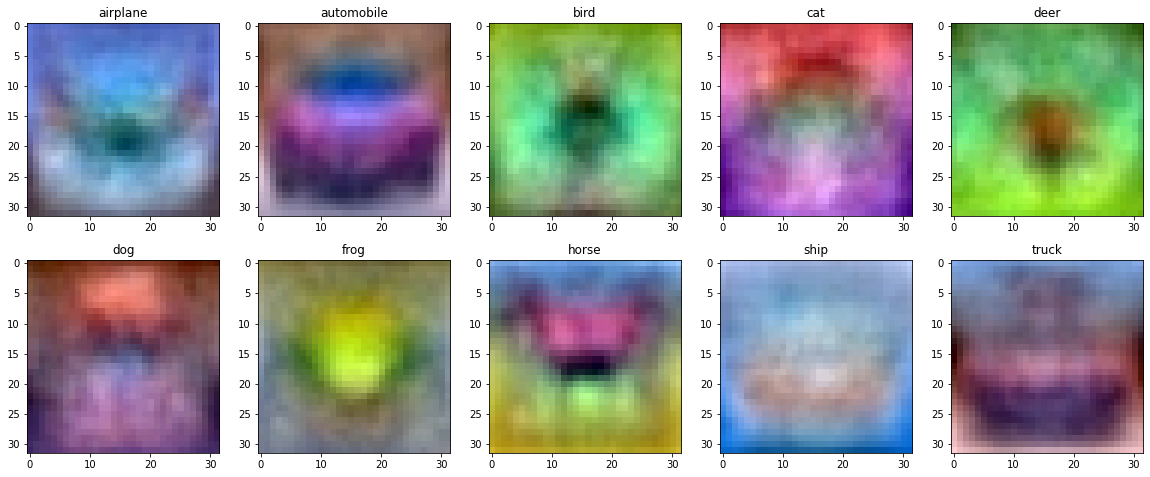

In [99]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(20,8))
for i in range(theta.shape[1]):  
  image = theta[:,i]
  image = (image - image.min())/(image.max()-image.min())
  image = image.reshape(32,32,3)
  plt.subplot(2,5,i+1)
  plt.imshow(image)
  plt.title(str(classes[i]))